<a href="https://colab.research.google.com/github/minwoo111111/AI-Python/blob/main/240524_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#실습

###붓꽃 데이터 분석

####데이터 읽어와서 확인하기

In [28]:
#데이터 파일 읽어오기
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df=sns.load_dataset('iris')
df


#데이터의 기본 정보 출력
df.info()

#데이터의 기초 통계량 출력
df.describe()

#품종별 개수 구하기
df['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#붓꽃 데이터 전처리

In [55]:
#결측치 확인하기
df.isna().sum()

#중복데이터 확인하기
df.duplicated()  #각 열마다 중복데이터 여부를 True/False로
df[df.duplicated()] #몇번 인덱스의 어느 행인지 중복데이터에 해당하는 것을 데이터프레임의 형태로 확인가능

#중복데이터 모두 확인하기
idx=(df['sepal_length']==5.8) & (df['petal_width']==1.9)  #이렇게 찾아낸 중복데이터값의 인덱스값을 찾아낸 후
df.loc[idx,:]  #??????

#중복데이터 삭제하기
df.drop_duplicates
df2=df[df.duplicated()]  #df2에 중복데이터 제거한 걸 덮어씀 (????)
df2[df2.duplicated()]


AttributeError: 'function' object has no attribute 'duplicated'

In [51]:
#중복데이터 모두 확인하기
idx=(df['sepal_length']==5.8) & (df['petal_width']==1.9)  #이렇게 찾아낸 중복데이터값의 인덱스값을 찾아낸 후
df.loc[idx,:]

,sepal_length,sepal_width,petal_length,petal_width,species,index
101,5.8,2.7,5.1,1.9,virginica,101
142,5.8,2.7,5.1,1.9,virginica,142


In [35]:
#중복데이터 모두 확인하기
df[df.duplicated()]


,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


#붓꽃 데이터 그룹핑

In [32]:
#품종 열을 기준으로 합계 구하기
speciessum=df.groupby('species').sum()
speciessum  #이렇게 하면 품종 열을 기준으로 각 칼럼의 합계가 구해진다


#품종 열을 기준으로 평균 구하기
speciesmean=df.groupby('species').mean()
speciesmean  #이렇게 하면 품종 열을 기준으로 각 칼럼의 평균이 구해진다

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#붓꽃 데이터 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

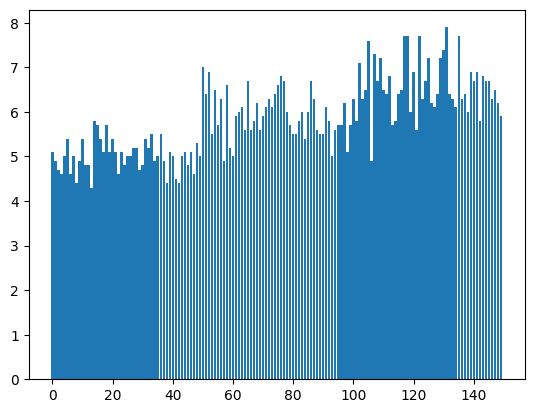

In [56]:
#막대그래프 그리기
##꽃받침 길이의 시각화
df['index']=df.index    #데이터프레임에 인덱스 칼럼이 없는 경우 임의로 추가해주기
x=df['index']
plt.bar(x,df['sepal_length'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

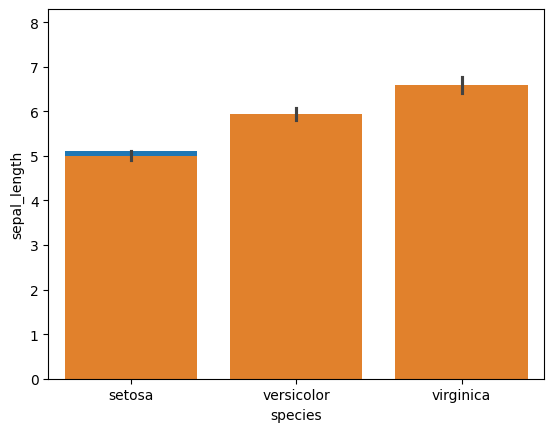

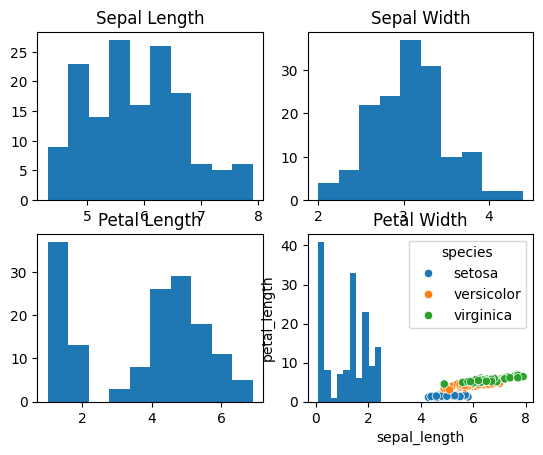

In [46]:
##붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화
sns.barplot(x='species', y='sepal_length', data=df)
plt.show


#히스토그램 그래프 그리기: 각 특징 4가지 값들의 빈도수에 대한 시각화
fig, axs=plt.subplots(2,2)
axs[0,0].hist(df['sepal_length'])
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(df['sepal_width'])
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(df['petal_length'])
axs[1,0].set_title('Petal Length')
axs[1,1].hist(df['petal_width'])
axs[1,1].set_title('Petal Width')
plt.show




<function matplotlib.pyplot.show(close=None, block=None)>

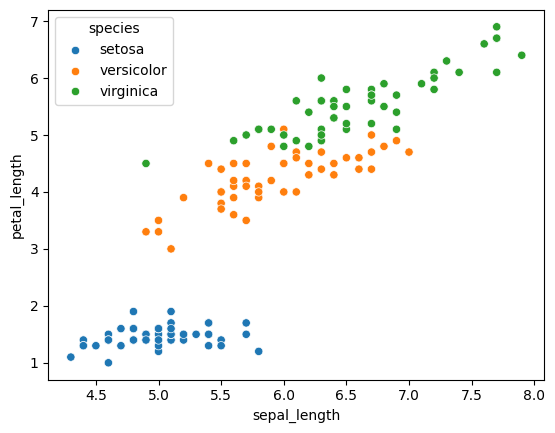

In [47]:
#산점도 그래프 그리기: 꽃받침의 길이와 꽃잎의 길이의 산점도를 시각화
sns.scatterplot(x='sepal_length',y='petal_length', hue='species', data=df)
plt.show